In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from hmmlearn import hmm

[0.4 0.3 0.3]
[[0.6 0.3 0.1]
 [0.2 0.7 0.1]
 [0.3 0.2 0.5]]
[[0.1  0.7  0.2 ]
 [0.05 0.25 0.7 ]
 [0.8  0.15 0.05]]


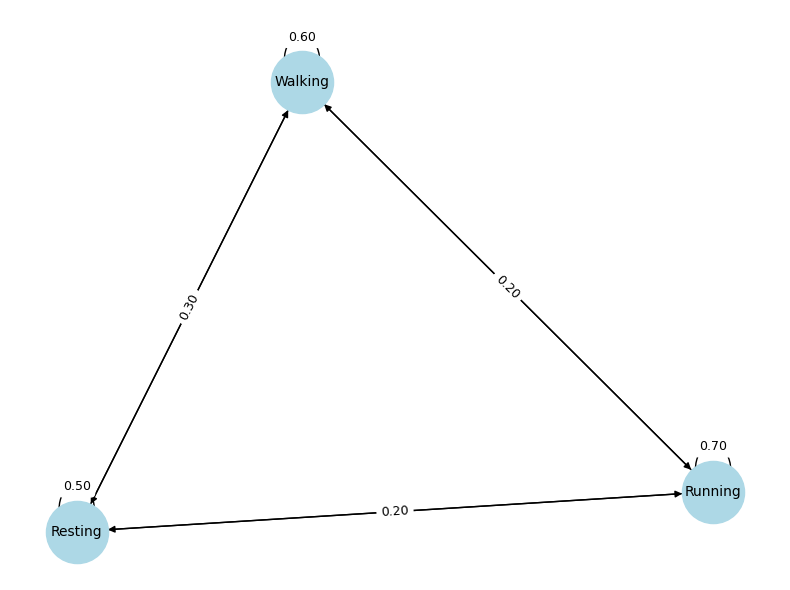

In [5]:
# a)

states = ["Walking", "Running", "Resting"]
n_components = len(states)
observations_labels = ["L", "M", "H"]
n_observations = len(observations_labels)

startp = np.array([0.4, 0.3, 0.3])

tp = np.array([
    [0.6, 0.3, 0.1],
    [0.2, 0.7, 0.1],
    [0.3, 0.2, 0.5],
])

ep = np.array([
    [0.1, 0.7, 0.2],
    [0.05, 0.25, 0.7],
    [0.8, 0.15, 0.05],
])

model = hmm.CategoricalHMM(n_components)
model.startprob_ = startp
model.transmat_ = tp
model.emissionprob_ = ep

print(model.startprob_)
print(model.transmat_)
print(model.emissionprob_)

out_dir = os.path.join(os.path.dirname('./'), 'outputs')
os.makedirs(out_dir, exist_ok=True)

# diagram
G = nx.DiGraph()
for s in states:
    G.add_node(s)
for i, a in enumerate(states):
    for j, b in enumerate(states):
        prob = tp[i][j]
        if prob > 0:
            G.add_edge(a, b, weight=prob)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, node_color='lightblue', node_size=2000, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
plt.axis('off')
plt.tight_layout()
save = os.path.join(out_dir, 'diagrama_stari_hmm.png')
plt.savefig(save, dpi=200, bbox_inches='tight')

In [6]:
# b)

observed_activities = ["M", "H", "L"]
activity_to_index = {"M": 1, "H": 2, "L": 0}
observations = np.array([activity_to_index[g] for g in observed_activities]).reshape(-1, 1)

log_prob = model.score(observations)
prob = np.exp(log_prob)
print(f"Probability of observed grades: {prob:.8f}")

Probability of observed grades: 0.02111725


In [7]:
# c)

log_prob, seq = model.decode(observations, algorithm="viterbi")
decoded_states = [states[i] for i in seq]
print("Most probable sequence of difficulties:", decoded_states)
print(f"Probability of this sequence: {np.exp(log_prob):.8f}")

Most probable sequence of difficulties: ['Walking', 'Running', 'Resting']
Probability of this sequence: 0.00470400
